In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sb

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx to Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx


In [4]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx']))

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
# Show basic descriptive statistics for the numeric columns
df.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,Black,White,Asian,Latino,MI,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,...,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.369985,0.098917,0.025685,0.372108,0.042666,...,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.482852,0.298583,0.158209,0.483418,0.202125,...,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
50%,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.500000,0.000000,1.000000,0.100000,0.000000,1.000000,0.010000,0.000000
75%,1.000000,1.000000,9.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.020000,0.000000
max,1.000000,1.000000,56.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000100,1.000000,1.000000,50.000100,1.000000,1.000000,9.560000,1.000000


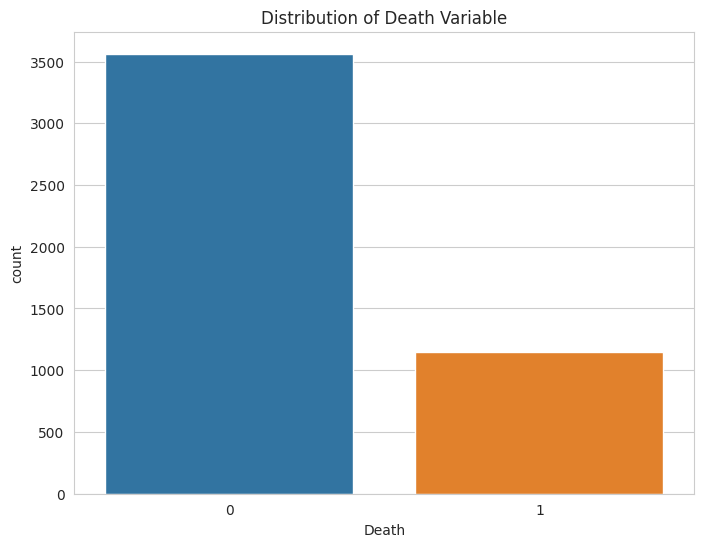

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style of the plot
sns.set_style("whitegrid")

# Create a countplot for the 'Death' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Death', data=df)
plt.title('Distribution of Death Variable')
plt.show()

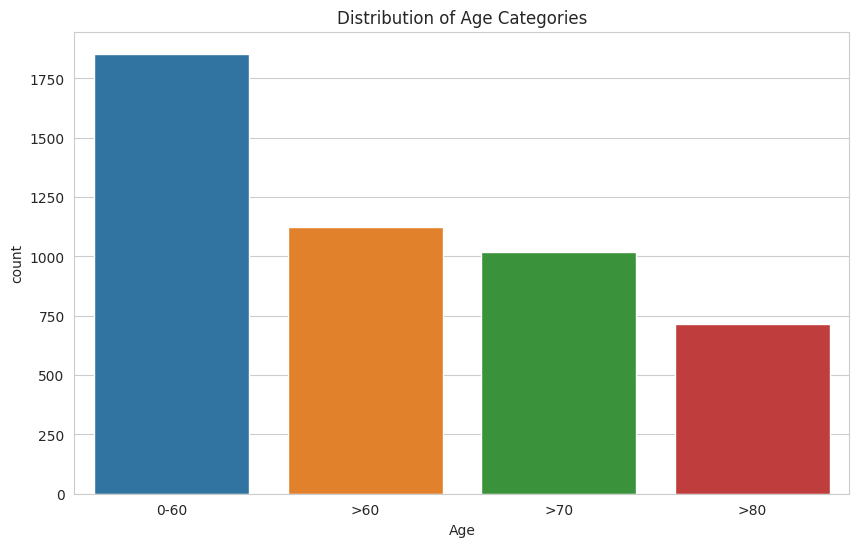

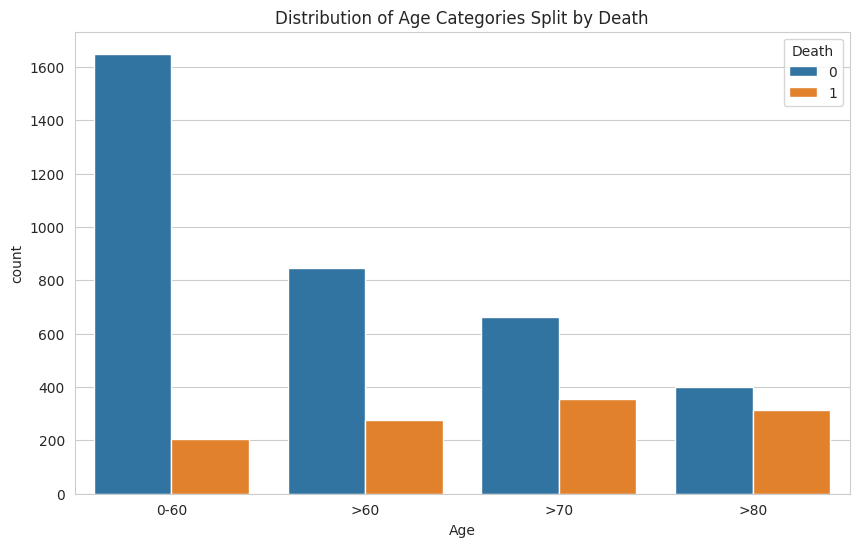

In [8]:
# Countplot for 'Age'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, order=sorted(df['Age'].unique()))
plt.title('Distribution of Age Categories')
plt.show()

# Countplot for 'Age' split by 'Death'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Death', data=df, order=sorted(df['Age'].unique()))
plt.title('Distribution of Age Categories Split by Death')
plt.show()

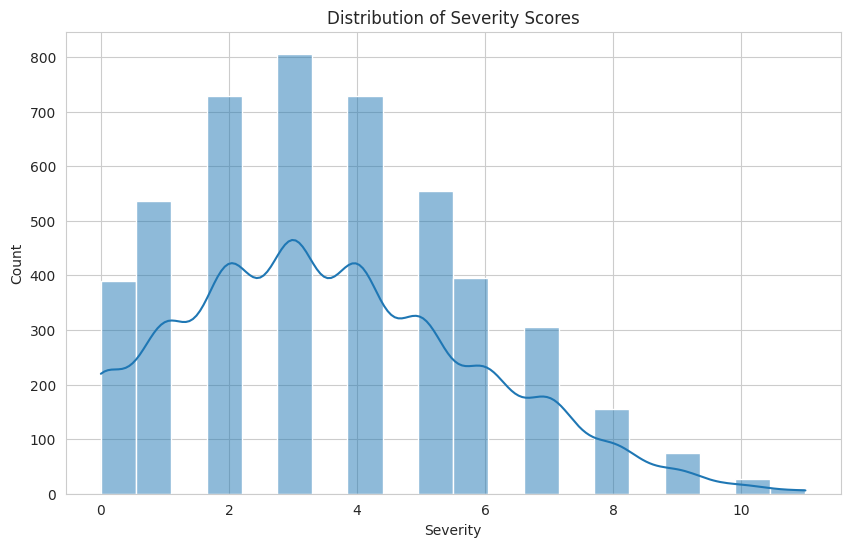

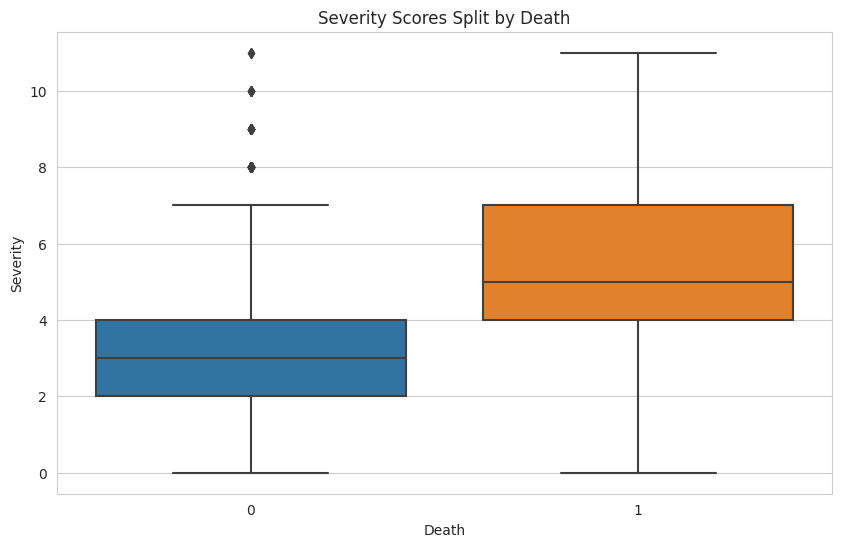

In [9]:
# Histogram for 'Severity'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', bins=20, kde=True)
plt.title('Distribution of Severity Scores')
plt.show()

# Boxplot of 'Severity' split by 'Death'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Death', y='Severity', data=df)
plt.title('Severity Scores Split by Death')
plt.show()

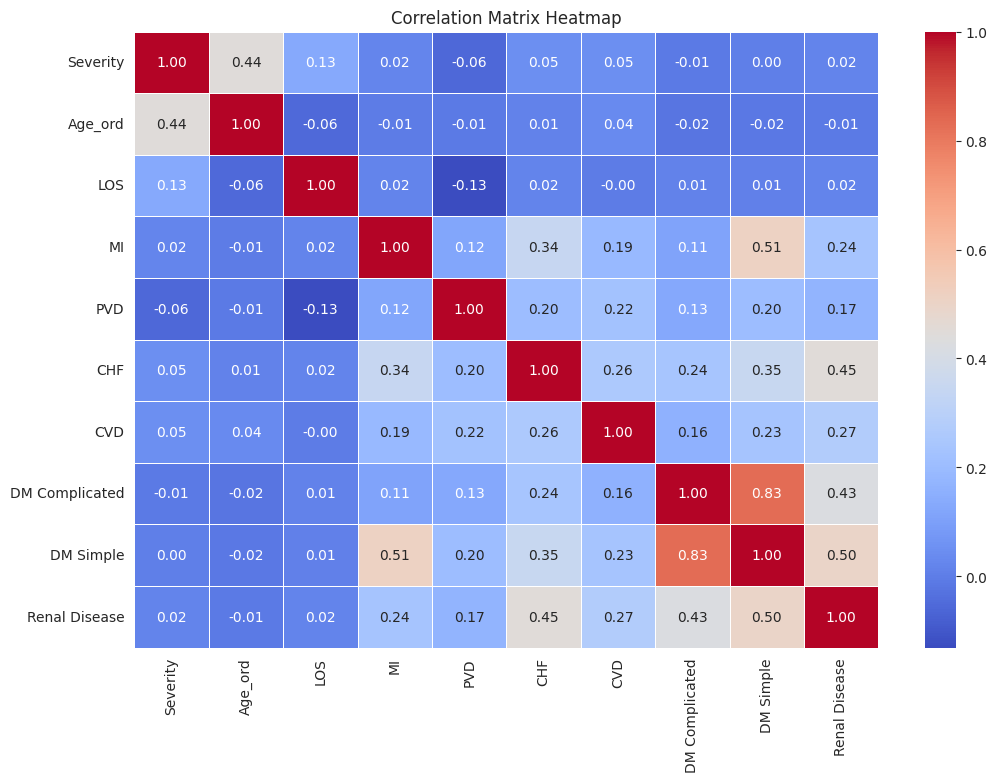

In [11]:
# Update the selected columns
selected_cols = ['Severity', 'Age_ord', 'LOS', 'MI', 'PVD', 'CHF', 'CVD', 'DM Complicated', 'DM Simple', 'Renal Disease']

# Calculate the correlation matrix for the selected columns
corr_matrix = df[selected_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

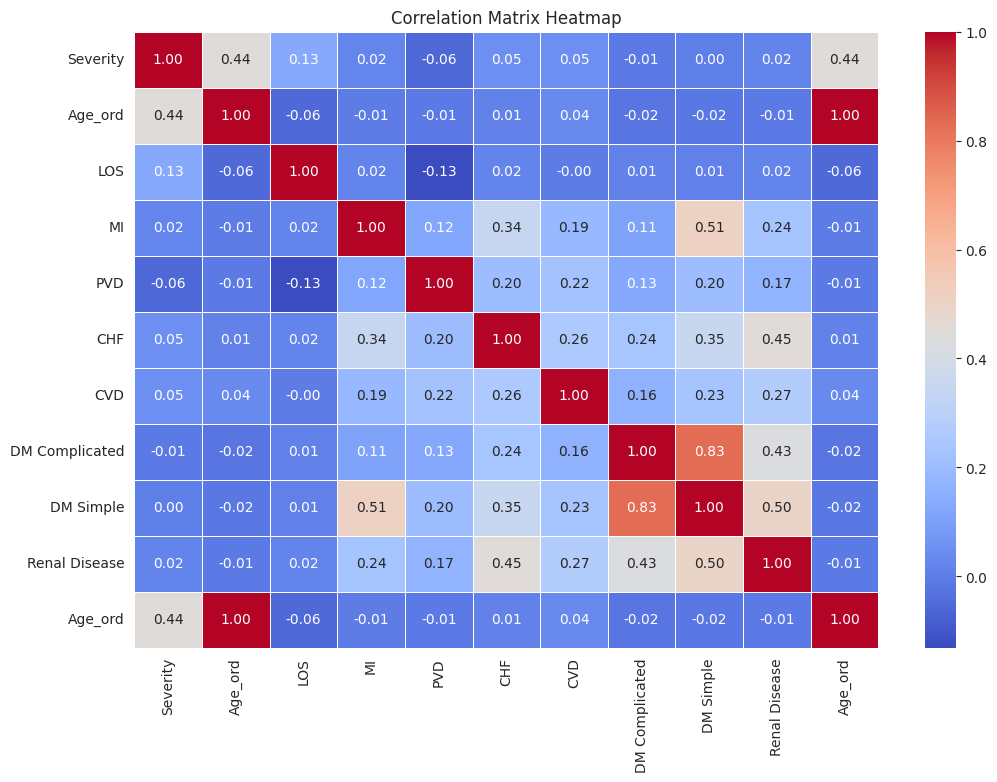

In [12]:
# Add 'Age_ord' to the selected columns list
selected_cols.append('Age_ord')

# Calculate the correlation matrix for the selected columns
corr_matrix = df[selected_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# Fill missing values with -999
df_vif = df[selected_cols].fillna(-999)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,Severity,1.939129
1,Age_ord,inf
2,LOS,1.971550
3,MI,2.619936
4,PVD,1.314193
5,CHF,1.581265
6,CVD,1.291716
7,DM Complicated,6.404043
8,DM Simple,9.434151
9,Renal Disease,1.874566
